Text(2.5, -1.5, 'Level curve')

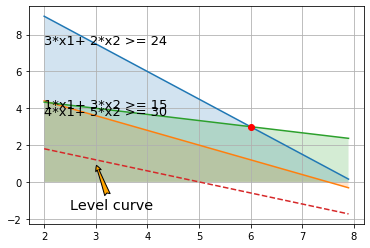

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from pulp import *
import time

c = [3, 5]
A = [[3,2],[4,5],[1,3]]
b = [24, 30, 15]


def f(b, a1, a2, x):
    y = np.array([])
    for xIter in x:
        yIter = (b-a1*xIter)/a2
        y = np.append(y, yIter)
    return y

x = np.arange(2, 8, 0.1)
for i in range(len(A)):
    y = f(b=b[i], a1=A[i][0], x=x, a2=A[i][1])
    plt.plot(x, y)
    plt.fill_between(x, y, alpha=0.2)
    plt.text(2, (b[i]-A[i][0]*3)/A[i][1], 
             '{a1}*x1+ {a2}*x2 >= {b}'.format(a1=A[i][0], a2=A[i][1], b=b[i]),
            fontsize = 13)
plt.grid()
plt.plot(x, (c[0]*c[1]-np.abs(c[0])*x)/np.abs(c[1]), '--')
plt.plot(res.x[0], res.x[1], 'ro')
plt.annotate('Level curve', 
             xy=(3, 1), 
             xytext=(2.5, -1.5), 
             size='x-large', arrowprops=dict(facecolor='orange', arrowstyle='fancy'))

In [132]:
from scipy.optimize import linprog
from pulp import *
import time
import numpy as np
print("Scipy")
start = time.time()
c = [3, 5]
A = [[-3,-2],[-4,-5],[-1,-3]]
b = [-24, -30, -15]
x0_bounds = (0,None)
x1_bounds = (0,None)
res = linprog(c,A_ub =A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print(res)
stop = time.time()
print("Time :")
print(stop - start)

Scipy
     con: array([], dtype=float64)
     fun: 32.999999843519035
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([-8.58943174e-08,  8.99999983e+00, -8.35321625e-08])
  status: 0
 success: True
       x: array([5.99999999, 2.99999998])
Time :
0.01700115203857422


In [135]:
from scipy.optimize import linprog
from pulp import *
import time
import numpy as np
start = time.time()
x1 = pulp.LpVariable("x1", lowBound =0)
x2 = pulp.LpVariable("x2", lowBound =0)
problem = pulp.LpProblem('0',LpMinimize)
problem += 3*x1 + 5*x2, "Objective function"
problem += 3*x1 + 2*x2 >=24, "1-st constrain"
problem += 4*x1 + 5*x2 >=30, "2-d constrain"
problem += 1*x1 + 3*x2 >=15, "3-d constrain"
problem.solve()
print("Result: ")
answer = []
for variable in problem.variables():
    print(variable.name, "=", variable.varValue)
    answer.append(variable.varValue)
print("Cost:\n",3*answer[0] + 5*answer[1])
stop = time.time()
print("Time :")
print(stop - start)

Result: 
x1 = 6.0
x2 = 3.0
Cost:
 33.0
Time :
0.02700042724609375


In [136]:
np.allclose(res.x,answer)

True

In [140]:
start = time.time()

b_ub = [85, 110, 65, 80, 340]
b_eq = [90,70,70,60,50]  
A=np.array([[14, 8, 7, 15, 9],[4, 5, 11, 8, 14],[15, 12, 6, 5, 9],[10, 8, 6, 4, 5]])

n, m = A.shape
c=list(np.reshape(A,n*m))
A_ub= np.zeros([m,m*n])
for i in np.arange(0,m,1):
    for j in np.arange(0,n*m,1):
        if i*n<=j<=n+i*n-1:
            A_ub  [i,j]=1
A_eq= np.zeros([m,m*n])
for i in np.arange(0,m,1):
    k=0
    for j in np.arange(0,n*m,1):
        if j==k*n+i:
            A_eq [i,j]=1
            k=k+1
print(linprog(c, A_ub, b_ub, A_eq, b_eq))

stop = time.time()
print("Time :")
print(stop - start)

     con: array([3.22614305e-06, 2.46705075e-06, 2.46705052e-06, 2.08750397e-06,
       1.74591278e-06])
     fun: 1719.999953076122
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 45.00000095,  39.99999828,  64.99999955,  30.00000184,
       210.00000962])
  status: 0
 success: True
       x: array([3.99999985e+01, 2.03872047e-07, 2.25360053e-07, 9.95043938e-08,
       1.61563593e-07, 6.99999969e+01, 4.50663293e-06, 1.25463027e-07,
       1.32028695e-07, 1.10975275e-07, 8.68612086e-08, 1.16458279e-07,
       4.99999976e+01, 1.77262971e-07, 1.92679743e-07, 1.94130134e-07,
       3.65819444e-07, 1.15295365e-07, 6.99999925e+01, 5.99999974e+01])
Time :
0.02900385856628418
